<a href="https://colab.research.google.com/github/kivvgsr/data-science/blob/main/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://drive.google.com/file/d/1nKKXywzeylOfrD3sQTXAY2nT7t5gF5bL/view?usp=sharing
file_id = "1nKKXywzeylOfrD3sQTXAY2nT7t5gF5bL"
url = f"https://drive.google.com/uc?id={file_id}"

# Define the local file path where you want to save the dataset
output_path = "/content/dataset.csv"

# Download the dataset using gdown
import gdown
gdown.download(url, output_path, quiet=False)
encoding = "ISO-8859-1"

# Now you can read the dataset using pandas or any other relevant library
import pandas as pd
df = pd.read_csv(output_path,encoding=encoding)

Downloading...
From: https://drive.google.com/uc?id=1nKKXywzeylOfrD3sQTXAY2nT7t5gF5bL
To: /content/dataset.csv
100%|██████████| 685k/685k [00:00<00:00, 105MB/s]


In [2]:
from matplotlib import pyplot as plt
import numpy as np


%matplotlib inline

In [3]:
df.shape
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8011,8012,15723437,Sal,701,France,Female,35,2,0.00,2,1,1,65765.22,0
9035,9036,15807555,Chung,535,France,Male,45,2,0.00,2,1,0,125658.28,0
9374,9375,15632538,Watson,658,Spain,Female,32,5,145553.07,1,1,1,31484.76,0
2962,2963,15605000,John,550,France,Male,38,9,140278.99,3,1,1,171457.06,1
1044,1045,15779059,Timms,670,France,Female,38,4,119624.54,2,1,1,110472.12,0


In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.drop('CustomerId',axis = 'columns',inplace=True)



In [7]:
df.drop(['RowNumber','Surname'],axis='columns',inplace=True)

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

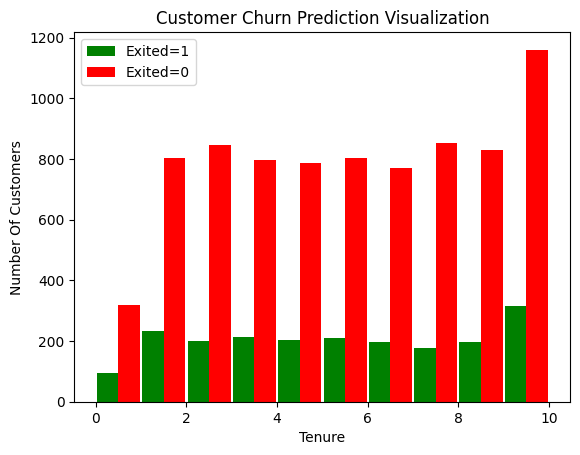

In [16]:
import matplotlib.pyplot as plt

# Separate the data based on the "Excited" column values
tenure_excited_no = df[df['Exited'] == 0]['Tenure']
tenure_excited_yes = df[df['Exited'] == 1]['Tenure']

# Plot histogram for the "Tenure" of customers based on whether they exited or not
plt.hist([tenure_excited_yes, tenure_excited_no], rwidth=0.95, color=['green', 'red'], label=['Exited=1', 'Exited=0'])
plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.legend()

# Show the plot
plt.show()


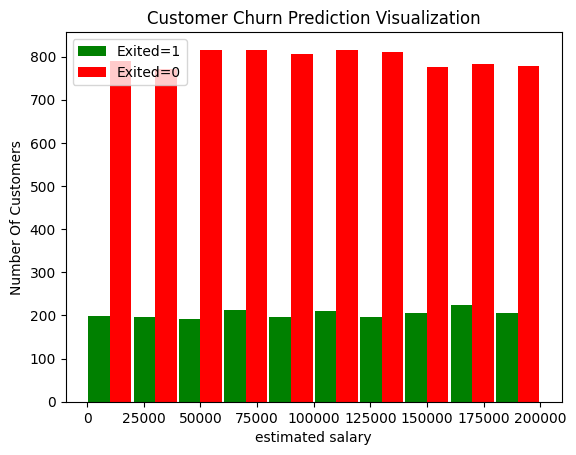

In [32]:
import matplotlib.pyplot as plt

# Separate the data based on the "Excited" column values
tenure_excited_no = df[df['Exited'] == 0]['EstimatedSalary']
tenure_excited_yes = df[df['Exited'] == 1]['EstimatedSalary']

# Plot histogram for the "Tenure" of customers based on whether they exited or not
plt.hist([tenure_excited_yes, tenure_excited_no], rwidth=0.95, color=['green', 'red'], label=['Exited=1', 'Exited=0'])
plt.xlabel("estimated salary")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.legend()

# Show the plot
plt.show()


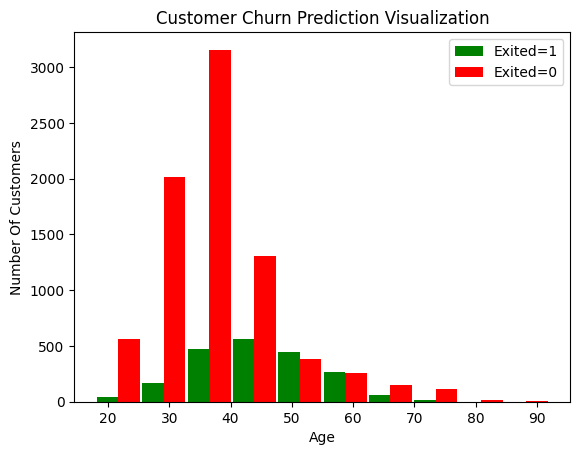

In [33]:
import matplotlib.pyplot as plt

# Separate the data based on the "Excited" column values
tenure_excited_no = df[df['Exited'] == 0]['Age']
tenure_excited_yes = df[df['Exited'] == 1]['Age']

# Plot histogram for the "Tenure" of customers based on whether they exited or not
plt.hist([tenure_excited_yes, tenure_excited_no], rwidth=0.95, color=['green', 'red'], label=['Exited=1', 'Exited=0'])
plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.legend()

# Show the plot
plt.show()


In [18]:
#lets  get the unique values in the each column
def print_unique_col(df):
  for columns in df:
    if df[columns].dtypes == 'object' :
      print(f'{columns}:{df[columns].unique()}')

In [19]:
print_unique_col(df)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [20]:
df['Gender'].replace({'Female':1,"Male":0},inplace=True)

In [24]:
df['Gender'].unique()


array([1, 0])

In [25]:
#lets  get the unique values in the each column
def print_unique_col(df):
  for columns in df:
    if df[columns].dtypes == 'object' :
      print(f'{columns}:{df[columns].unique()}')

In [26]:
print_unique_col(df)

Geography:['France' 'Spain' 'Germany']


#lets perform one hot encoding for the Geography column

In [27]:
df1 = pd.get_dummies(data = df,columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [29]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [30]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [34]:
for col in(df1):
  print(f"{col}:{df1[col].unique()}")

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [35]:
cols_to_scale = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [36]:
df1.head()
for col in(df1):
  print(f'{col}:{df1[col].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [37]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [38]:

X_train.shape

(8000, 12)

In [39]:

X_test.shape

(2000, 12)

In [40]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [42]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') # here the output layer is having the 2 node
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy', # here our output is 0,1 so we use this
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4927 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7975
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8062
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8134
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8169
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8174
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8220
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8269
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8309
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3867 - accura

In [43]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8470


[0.35478565096855164, 0.847000002861023]

In [44]:
prd = model.predict(X_test)
prd[:5]

63/63 [==============================] - 0s 884us/step


array([[0.02727548],
       [0.05787472],
       [0.04143376],
       [0.06040574],
       [0.06191392]], dtype=float32)

In [45]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [46]:
y_pre =[]
for i in prd:
  if i<0.5:
    y_pre.append(0)
  else:
    y_pre.append(1)

In [47]:
y_pre[:8]

[0, 0, 0, 0, 0, 0, 0, 0]

In [48]:
y_test[:8]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
Name: Exited, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.68      0.46      0.55       405

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.83      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

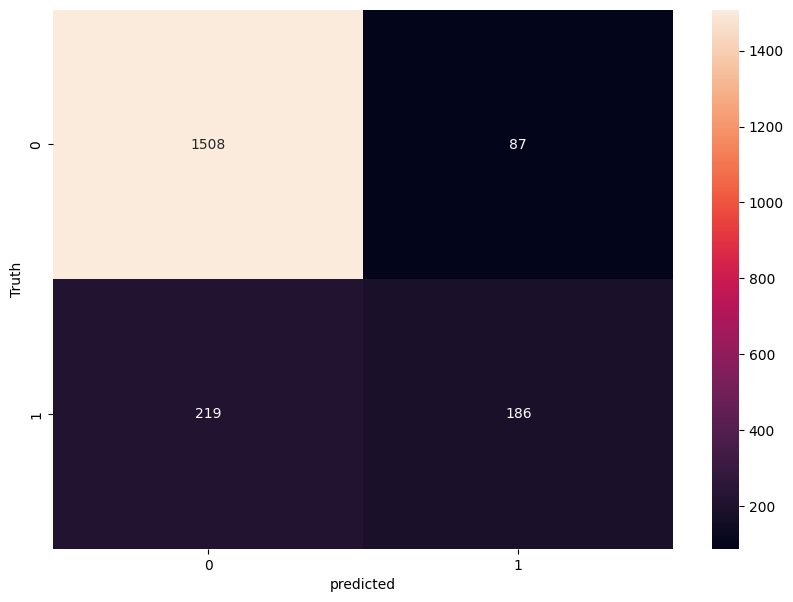

In [52]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pre)
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

#precision of 0,1 are:

In [53]:
round(1508/(1508+219),2) # for 000000000000000000

0.87

In [54]:
round(186/(186+87),2)  # for 111111111111111

0.68

# recall for  0 and 1

In [55]:
round(1508/(1508+87),2) # for 000000000000000000

0.95

In [56]:
round(186/(186+219),2)  # for 111111111111111

0.46